In [1]:
# Pacotes 
from LightPipes import *
from matplotlib import image
from scipy.fft import fft2, ifft2 ,fftshift
from scipy import special
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy
import random

## Auto Valor 

In [2]:
delta = .15*mm         # comprimento de coerência

In [13]:
# Parâmetros do feixe TGSM
lambd = 780*nm        # light wavelength
sigma = .15*mm         # largura

# Parâmetros da expansão (eqs 6-8)
k = 2*np.pi/lambd
a = 1/(4*sigma**2) # [L]^-2
b = 1/(2*delta**2) # [L]^-2

mu = round(.99999/(k*delta**2), 6)

t = np.sqrt(abs((b+k*mu/2)/(b-k*mu/2))) # # no unit, always positive
auxNum = np.sqrt(4*a**2+8*a*b+(k*mu)**2) # [L]^-2, always positive
w = np.sqrt(2/auxNum) # [L], always positive
chi = ((2*a+2*b-auxNum)/(2*a+2*b+auxNum)) # no unit, always positive??

weight_cutoff = 0.015
print(k*mu*delta**2)


0.9999899661423126


Número total de modos:  11 . Ver modos [L,P] abaixo:


c:\Users\gubio\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


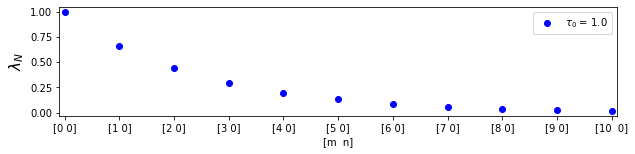

In [14]:
import sys

# Determinando os modos que precisam entrar na decomposição
p_par=np.arange(0,20)
l_par=np.arange(-15,15)
lp_par = np.zeros((l_par.size*p_par.size,2),dtype=int)
bla = np.zeros((l_par.size*p_par.size))
#lp_par[0] = [1,1]
#print(lp_par)

weight_00 = np.pi/2*w**2*(1-chi)*t**0*chi**(abs(0)/2+0)

contador=0
for i in p_par:
  #print(p_par[i])
  for j in l_par:
    weight = np.pi/2*w**2*(1-chi)*t**l_par[j]*abs(chi)**(abs(l_par[j])/2+p_par[i])
    #print(l_par[j], p_par[i], abs(chi)**(abs(l_par[j])/2+p_par[i]))
    if weight/weight_00 >= weight_cutoff:
      lp_par[contador,:]=[l_par[j], p_par[i]]
      bla[contador] = weight
      contador = contador +1

lp_par = lp_par[:contador,:]
bla    = bla[:contador]


print("Número total de modos: ", contador, ". Ver modos [L,P] abaixo:")
#print(lp_par)
mu123 = round(k*mu*delta**2, 2)
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(np.arange(0,lp_par.shape[0]), bla/weight_00,'bo',label =f'$\u03C4_0$ = {mu123}' )
plt.margins(x=0.01)
ax.set_xticks(np.arange(0,lp_par.shape[0]))
ax.set_xticklabels(lp_par,rotation=0)
plt.ylabel('$\lambda_N$ ', fontsize=15)
plt.xlabel('[m  n]')
plt.legend(fontsize=10)
plt.show()

# campo 

In [65]:
def caiLG(L,P,w,lamb,xx,yy):
  z_R  = np.pi*w**2/lamb  
  r    = np.sqrt(xx**2+yy**2)                                                 
  C    = np.sqrt(2*np.math.factorial(P)/(np.pi*np.math.factorial(P+abs(L))))
  PL   = scipy.special.assoc_laguerre(2*r**2/w**2,P,abs(L))

  Fase = np.exp(- 1j*L*np.arctan2(yy,xx) )
  LG   = C*1/w*(r*np.sqrt(2)/w)**abs(L)*PL*np.exp( -r**2/w**2)*Fase

  return LG

In [66]:
# Gerando os campos para a soma incoerente
# Parâmetros do feixe TGSM

n  = 2**7
dx = 10*um  
x = np.arange(-n/2, n/2,1)*dx
xx,yy = np.meshgrid(x,x)
S =  np.exp(1j*np.zeros((n,n,lp_par.shape[0])))

for i in range(lp_par.shape[0]):
  weight = np.pi/2*w**2*(1-chi)*t**lp_par[i,0]*chi**(abs(lp_par[i,0])/2+lp_par[i,1])
  # usando a função do artigo para os modos
  LG = caiLG(lp_par[i,0],lp_par[i,1],w,lambd,xx,yy)
  S[:,:,i] = np.sqrt(weight)*LG


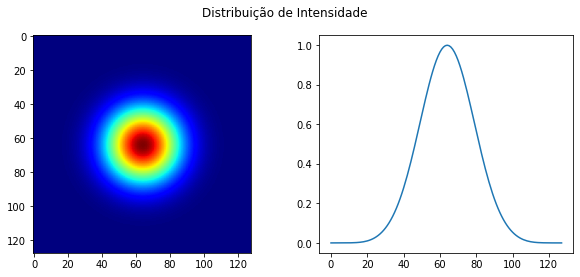

In [67]:
# show the total image of the incoherent sum
img = np.sum(abs(S)**2,2)
img = img/img.max()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Distribuição de Intensidade')

ax1.imshow(img,cmap="jet")
ax2.plot(img[:,64])
plt.show()

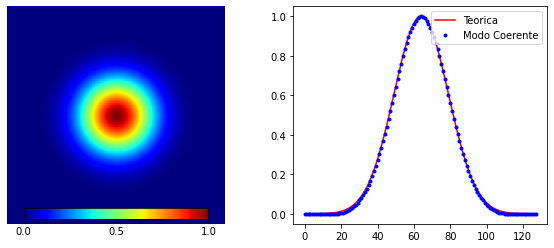

In [221]:
# _________ Modo Coerente __________________

#plt.subplots(figsize=(10,4))

Int_T =  np.exp( - x**2/(2*sigma**2 )  )
#---------------------------------------------------------------------
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 4])
axins1 = inset_axes(ax1, width="85%", height="5%",loc='lower center')

#plt.title(" Intensidedade")
im1 = ax1.imshow(img,cmap='jet')
ax1.axis("off")
fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[0,0.5,1])
#---------------------------------------------------------------------
#ax2.ylabel(" $I(\mathbf{x}_1,0)$")
ax2.plot(Int_T,'r',label='Teorica')
ax2.plot(img[:,64],'b.',label='Modo Coerente')
ax2.legend(loc=1)

plt.show()

# Interferenica 

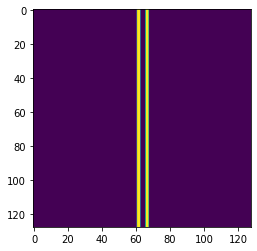

In [29]:
# Inicialização# Fenda dupla
class grid:
  pass
grid.N  = n;   
grid.dx = dx                               
grid.x  = np.arange(-grid.N/2,grid.N/2,1)*grid.dx;
[grid.xx,grid.yy] = np.meshgrid(grid.x,grid.x);  

d0 = .05*mm; 
a0 = (0.05/3)*mm; 
# make slit
fslit = (np.ones_like(grid.xx)*(abs(grid.xx+(d0/2))<=a0/2) +
         np.ones_like(grid.xx)*(abs(grid.xx-(d0/2))<=a0/2));
F  = Begin(abs(x[0])*2,lambd,n-1)  
plt.imshow(fslit);plt.show()

In [65]:
# passando pelas fendas --> soma incoerente
import sys
F = Begin(abs(x[0])*2,lambd,n)        # Criando o Campo no Lpipe
slitSS =[0]
FF = F.copy(F)
for i in range(lp_par.shape[0]):
  FF.field = S[:,:,i]*fslit
  FF1 = Forvard(1*cm,FF)
  slitSS += Intensity(FF1)
plt.imshow(slitSS/slitSS.max(),cmap = "jet");
plt.title("$\u03C4_0$= 0.3")
plt.colorbar();
plt.axis("off");
plt.show()

NameError: name 'x' is not defined

In [ ]:
# Ajustado para analisar na Direita e esquerda
### Função da Suavização #########################
def SUAVE(media, linha):
  novalista = []
  for i in range(media ,2**8,1):
    b = slitSS[linha,i-media:i]
    AA = sum(b)/media
    novalista.append(AA)
  return np.array(novalista)

def MM(suavizar,linha):
  maxi2 = SUAVE(suavizar,linha).max()
  posiçao2 = 0
  for i in SUAVE(suavizar,linha):
    if i == maxi2:
      break 
    posiçao2 +=1 

#### Encontrar o valor mínimo local a Direita parti do maximo global
  mini = 0
  Vimax = SUAVE(suavizar,linha)[posiçao2:2**8]
  for i in range(len(Vimax)):
    if i == len(Vimax)-1:
      break
    if Vimax[i] > Vimax[i+1]:
      mini = Vimax[i+1]
    elif Vimax[i] < Vimax[i+1]:
      mini = Vimax[i]
      break   
  # Vamos encontrar o posição no qual temos mínimo
  PMin = 0 
  for i in Vimax:
    if i == mini:
      break 
    PMin += 1  
  posiçaomin = posiçao2 + PMin -1
#######################################################################
#### Encontrar o valor mínimo local a ESQUERDA a parti do maximo lobal
  miniE = 0
  xamiV = SUAVE(suavizar,linha)[0:posiçao2]
#########################################################
  for i in range(len(xamiV)):
    i += 1
    if i == len(xamiV)-1:
      break
    if xamiV[-i] > xamiV[-i-1]:
      miniE = xamiV[-i-1]
    elif xamiV[-i] < xamiV[-i-1]:
      miniE = xamiV[-i]
      break   
  # Vamos encontrar o posição no qual temos mínimo
  PMinE = 0 
  for i in range(len(xamiV)):
    i+=1
    if xamiV[-i] == miniE: 
      break 
    PMinE += 1  
  posiçaominE = posiçao2 - PMinE

  if miniE > mini:
    posiçaomin = posiçaominE
    mini       = miniE
  # [0] = Valor max,[1] = Posição max ,[2] = Valor Min,[3] = Posição Min
  return maxi2, posiçao2, mini, posiçaomin  #,miniE, posiçaominE  

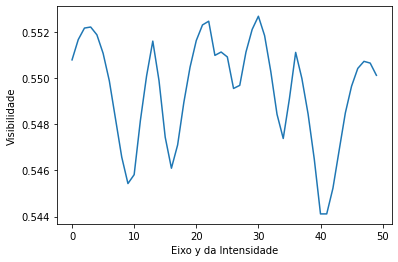

Valor medio da grau de coerencia/Visibilidade  0.5494760764670168


In [ ]:
# A VISIBILIDADE TODA
VisibilidadeN = []
q = 2
qq = 0
for j in range(n//2-25,n//2+25 ):
  V = ( MM(q,j)[0]-MM(q,j)[2])/(MM(q,j)[0]+MM(q,j)[2])
  VisibilidadeN.append(V) 
  qq+=1
  
plt.plot(VisibilidadeN);
plt.xlabel('Eixo y da Intensidade');plt.ylabel("Visibilidade");plt.show()
print("Valor medio da grau de coerencia/Visibilidade ",sum(VisibilidadeN)/qq)

# Lente 

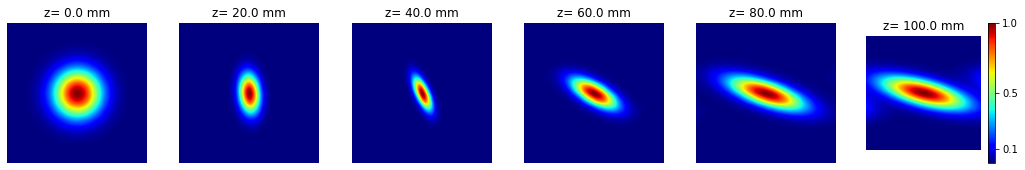

In [73]:
# passando por lente cilíndrica --> soma incoerente
# OBS: os valores de distância focal foram ajustados até reproduzir qualitativamente (espelhamento em relação à vertical) a figura 7
# sequência de propagação
dzPar = np.arange(0*mm,115*mm,step=20*mm)
fCyl = 50*mm
fSph = 100*mm

F = Begin(abs(x[0])*2,lambd,n)        # Criando o Campo no Lpipe
SS = np.zeros((n,n,dzPar.size))
FF = F.copy(F)

for j in range(dzPar.size):
  aux = [0]
  for i in range(lp_par.shape[0]):
    FF.field = S[:,:,i]
    FF = CylindricalLens(FF,fCyl)
    FF = Lens(FF,fSph)
    FF1 = Forvard(dzPar[j],FF)
    aux += Intensity(FF1)
  SS[:,:,j] = aux
# Mostrando o resultado
fig, ax = plt.subplots(figsize=(18,18))
for ii in range(dzPar.size):
    plt.subplot(6,6,ii+1)
    plt.title('z= %3.1f mm' % (dzPar[ii]*1e3) )
    kapa = plt.imshow(SS[:,:,ii]/SS[:,:,ii].max(),cmap='jet');
    plt.axis('off')

plt.colorbar( ticks=[0.1,0.5,1])
plt.show()

# Doc(r,0)

In [ ]:

ref = [0,0]                        
# coordenadas do ponto de referência para o cálculo do DOC (no artigo, usam r=0)
index = np.where((xx==ref[0])*(yy==ref[1])==True)        
# para achar os índices do ponto de referência na grade

# preparando matrizes
mu = np.zeros_like(S[:,:,1])            # aux4 = cada um dos campos dentro da soma incoerente (no plano em que se vai calcular o DOC=mu, ou seja, depois de propagar, fendas, etc)
intMap = np.sum(abs(S)**2,2)            # aux3 é a intensidade de aux4. Ou seja, intMap é a imagem do feixe parcialmente coerente (aquela que costumamos olhar)
# loop para cada ponto do plano/grade. O DOC vai ser calculado de cada ponto em relação ao ponto de referência (ver eq 29 do artigo "Three modal decompositions of Gaussian Schell-model sources: comparative analysis")
for ii in range(0,n):
    for jj in range(0,n):
        mu[ii,jj] = np.sum(np.conj(S[ii,jj,:])*S[index[0],index[1],:])/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])
# só para mostrar o resultado do DOC

img = abs(mu) 
img = img/img.max()

plt.imshow(img,cmap = "jet"); plt.title('|$\mu(\mathbf{r},0)$|')
plt.colorbar();
plt.show()

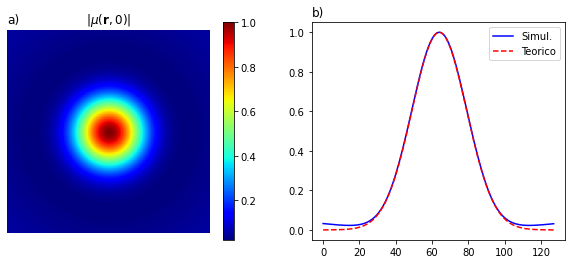

In [94]:
ref = [0,0]                        
index = np.where((xx==ref[0])*(yy==ref[1])==True)        

mu = np.zeros_like(S[:,:,1])
intMap = np.sum(abs(S)**2,2) 

for ii in range(0,n):
    for jj in range(0,n):
      mu[ii,jj] = np.sum( np.conj(S[ii,jj,:])*S[index[0],index[1],:]    )/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])

img = abs(mu) 
img = img/img.max()

BB = np.exp(-x**2/(2*delta**2) )


fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("a)", loc = 'left')
plt.imshow(img,cmap = "jet")
plt.title('|$\mu(\mathbf{r},0)$|')
plt.colorbar()
plt.axis("off")

plt.subplot(1,2,2)
plt.title("b)", loc = 'left')
plt.plot(img[:,64],"b", label='Simul.')
plt.plot(BB,"r--",label='Teorico')
#plt.axis("off")
plt.legend(loc=1)
plt.show()
